In [20]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.patches import Circle

from config import FIG_RESULTS_DIR
from drawutil import rfcolors, mpl_config

In [21]:
# global setting
SCALE = 1.0 # scale = 1.0 for write-up dimensions
mpl_config(SCALE)

11 12 True darkgray
21 22 True darkgray
31 33 False dimgray
32 33 False dimgray
41 42 True darkgray


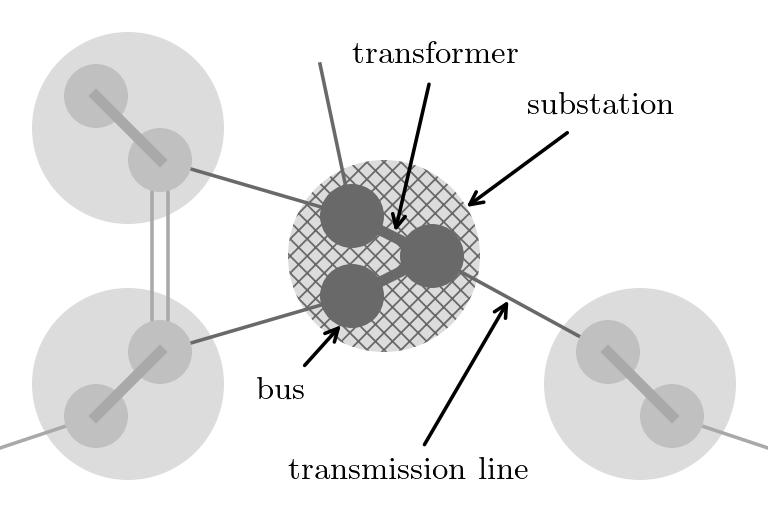

In [52]:
color_sub = 'gainsboro'
color_up = 'silver'
color_down = 'dimgray'

mpl.rcParams['hatch.linewidth'] = 0.5
mpl.rcParams['hatch.color'] = color_down

substations = {
    '1': Circle(( 4, 16), 3, fc=color_sub, zorder=0),
    '2': Circle(( 4,  8), 3, fc=color_sub, zorder=0),
    '3': Circle((12, 12), 3,  fc=color_sub, zorder=0, hatch='xxxxx'),
    '4': Circle((20, 8), 3, fc=color_sub, zorder=0),
}

buses = {
    # substation 1 (visible upper left)
    '11': Circle((3, 17), 1, fc=color_up, alpha=1),
    '12': Circle((5, 15), 1, fc=color_up, alpha=1),
    # substation 2 (visible lower left)
    '21': Circle((5,  9), 1, fc=color_up, alpha=1),
    '22': Circle((3,  7), 1, fc=color_up, alpha=1),
    # substation 3 (visible upper right)
    '31': Circle((11, 13.25), 1, fc=color_down, alpha=1),
    '32': Circle((11, 10.75), 1, fc=color_down, alpha=1),
    '33': Circle((13.5, 12), 1, fc=color_down, alpha=1),
    # substation 4 (visible lower right)
    '41': Circle((19, 9), 1, fc=color_up, alpha=1),
    '42': Circle((21, 7), 1, fc=color_up, alpha=1),
    # substation 5 (invisible lower left)
    '51': Circle((0, 6), 1, alpha=0),
    # substation 6 (invisible upper right)
    '61': Circle((10, 18), 1, alpha=0),
    # substation 7 (invisible lower right)
    '71': Circle((24, 6), 1, alpha=0)
}

transformers = [
    ('11', '12', True),
    ('21', '22', True),
    ('31', '33', False),
    ('32', '33', False),
    ('41', '42', True),
]

lines = [
    ('12', '31', False),
    ('12', '21', True),
    ('21', '32', False),
    ('22', '51', True),
    ('31', '61', False),
    ('33', '41', False),
    ('42', '71', True),
]

fig = plt.figure(figsize=(3, 2))
ax = plt.gca()

for substationidx, substation in substations.items():
    ax.add_patch(substation)
for busidx, bus in buses.items():
    ax.add_patch(bus)
    #if bus.get_alpha() > 0:
        #ax.annotate(busidx, bus.get_center(), va='center', ha='center')
for n, m, indicator in transformers:
    xn, yn = buses[n].get_center()
    xm, ym = buses[m].get_center()
    color = color_up
    
    if indicator:
        color = 'darkgray'
    else:
        color = 'dimgray'
    print(n, m, indicator, color)
    plt.plot((xn, xm), (yn, ym), '-', color=color, linewidth=3, zorder=1)
for n, m, indicator in lines:
    if indicator:
        color = 'darkgray'
    else:
        color = 'dimgray'
    xn, yn = buses[n].get_center()
    xm, ym = buses[m].get_center()
    if (n, m) == ('12', '21'):
        plt.plot((xn - 0.25, xm - 0.25), (yn - 0.25, ym - 0.25), '-',
                 color=color, lw=1, zorder=0)
        plt.plot((xn + 0.25, xm + 0.25), (yn + 0.25, ym + 0.25), '-',
                 color=color, lw=1, zorder=0)
    else:
        plt.plot((xn, xm), (yn, ym), '-', color=color, lw=1, zorder=0)

ax.annotate('substation', (14.4, 13.4), (16.5, 16.4),
            arrowprops={'arrowstyle': '->'})
ax.annotate('bus', (10.8, 10), (8, 7.5),
            arrowprops={'arrowstyle': '->'})
ax.annotate('transformer', (12.3, 12.55), (11, 18),
            arrowprops={'arrowstyle': '->'})
ax.annotate('transmission line', (16, 10.80), (9, 5),
            arrowprops={'arrowstyle': '->'})


plt.xlim([0, 24])
plt.ylim([4, 20])
ax.set_position([0, 0, 1, 1])
ax.axis('off')

nomenclature_filename_jpg = os.path.join(FIG_RESULTS_DIR, f'iise-nomenclature.jpg')
nomenclature_filename_eps = os.path.join(FIG_RESULTS_DIR, f'iise-nomenclature.eps')
plt.savefig(nomenclature_filename_jpg, format='jpg', dpi=256)
plt.savefig(nomenclature_filename_eps)
plt.close()
Image(nomenclature_filename_jpg)